In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:\\Users\\SRUTHI\\Downloads\\PRCP-1013-WalkRunClass\\Data\\walkrun.csv")

In [3]:
data.head()

date                time username  wrist  activity  acceleration_x  \
0  2017-6-30  13:51:15:847724020   viktor      0         0          0.2650   
1  2017-6-30  13:51:16:246945023   viktor      0         0          0.6722   
2  2017-6-30  13:51:16:446233987   viktor      0         0          0.4399   
3  2017-6-30  13:51:16:646117985   viktor      0         0          0.3031   
4  2017-6-30  13:51:16:846738994   viktor      0         0          0.4814   

   acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  
0         -0.7814         -0.0076 -0.0590  0.0325 -2.9296  
1         -1.1233         -0.2344 -0.1757  0.0208  0.1269  
2         -1.4817          0.0722 -0.9105  0.1063 -2.4367  
3         -0.8125          0.0888  0.1199 -0.4099 -2.9336  
4         -0.9312          0.0359  0.0527  0.4379  2.4922

In [4]:
data.tail()

date               time username  wrist  activity  acceleration_x  \
88583  2017-7-9  20:9:15:317911028   viktor      0         0          0.3084   
88584  2017-7-9  20:9:15:517889022   viktor      0         0          0.4977   
88585  2017-7-9  20:9:15:717828989   viktor      0         0          0.4587   
88586  2017-7-9  20:9:15:917932987   viktor      0         0          0.2590   
88587  2017-7-9  20:9:16:117410004   viktor      0         0          0.3140   

       acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  
88583         -0.8376         -0.1327  0.4823  2.0124  0.6048  
88584         -1.0027         -0.4397  0.1022 -1.2565 -0.0761  
88585         -1.1780         -0.2827 -1.4500 -0.2792 -1.2616  
88586         -0.8582         -0.0759 -1.5165  0.4560 -1.7755  
88587         -0.8008         -0.0911  0.1183  1.0850  1.2814

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [6]:
data.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

In [7]:
data["activity"].value_counts()

activity
1    44365
0    44223
Name: count, dtype: int64

In [8]:
data.shape

(88588, 11)

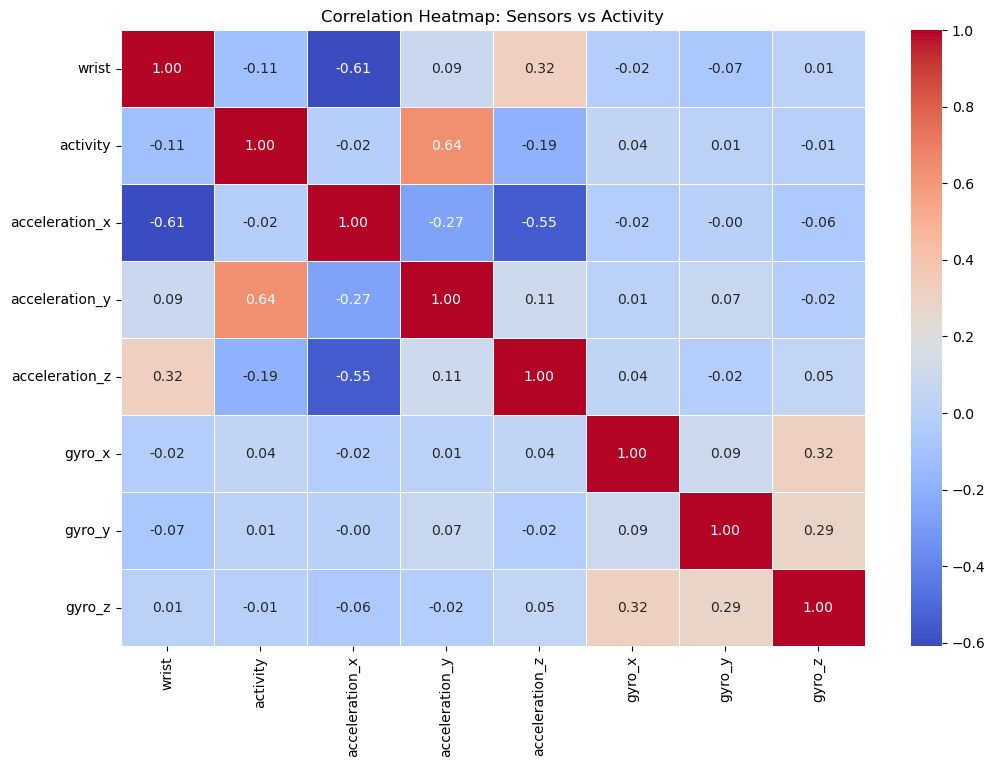

In [9]:
corr_matrix= data.iloc[:, 3:].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Sensors vs Activity')
plt.show()

C:\Users\SRUTHI\AppData\Local\Temp\ipykernel_23184\4008788563.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='activity', data=data, palette='viridis')


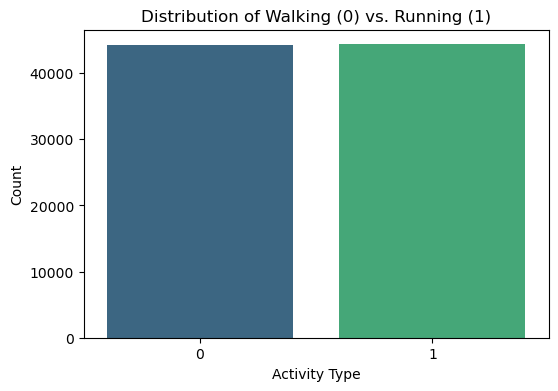

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='activity', data=data, palette='viridis')
plt.title('Distribution of Walking (0) vs. Running (1)')
plt.xlabel('Activity Type')
plt.ylabel('Count')
plt.show()

In [11]:
data['accel_mag'] = np.sqrt(data['acceleration_x']**2 + data['acceleration_y']**2 + data['acceleration_z']**2)
data['gyro_mag'] = np.sqrt(data['gyro_x']**2 + data['gyro_y']**2 + data['gyro_z']**2)

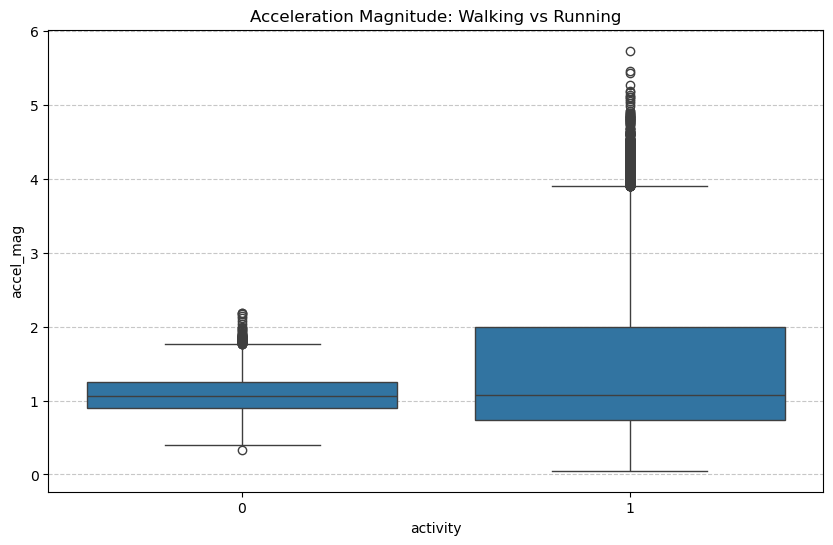

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='activity', y='accel_mag', data=data)
plt.title('Acceleration Magnitude: Walking vs Running')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [13]:
cleaned_data = data.drop(['date', 'time', 'username'], axis=1)

In [14]:
cleaned_data.describe()

wrist      activity  acceleration_x  acceleration_y  \
count  88588.000000  88588.000000    88588.000000    88588.000000   
mean       0.522170      0.500801       -0.074811       -0.562585   
std        0.499511      0.500002        1.009299        0.658458   
min        0.000000      0.000000       -5.350500       -3.299000   
25%        0.000000      0.000000       -0.381800       -1.033500   
50%        1.000000      1.000000       -0.059500       -0.759100   
75%        1.000000      1.000000        0.355500       -0.241775   
max        1.000000      1.000000        5.603300        2.668000   

       acceleration_z        gyro_x        gyro_y        gyro_z     accel_mag  \
count    88588.000000  88588.000000  88588.000000  88588.000000  88588.000000   
mean        -0.313956      0.004160      0.037203      0.022327      1.264443   
std          0.486815      1.253423      1.198725      1.914423      0.714896   
min         -3.753800     -4.430600     -7.464700     -9.480000      0.050465   
25%         -0.376000     -0.920700     -0.644825     -1.345125      0.837690   
50%         -0.221000      0.018700      0.039300      0.006900      1.064574   
75%         -0.085900      0.888800      0.733700      1.398200      1.372532   
max          1.640300      4.874200      8.498000     11.266200      5.737757   

           gyro_mag  
count  88588.000000  
mean       2.321613  
std        1.133569  
min        0.019317  
25%        1.471695  
50%        2.199334  
75%        3.050552  
max       11.779598

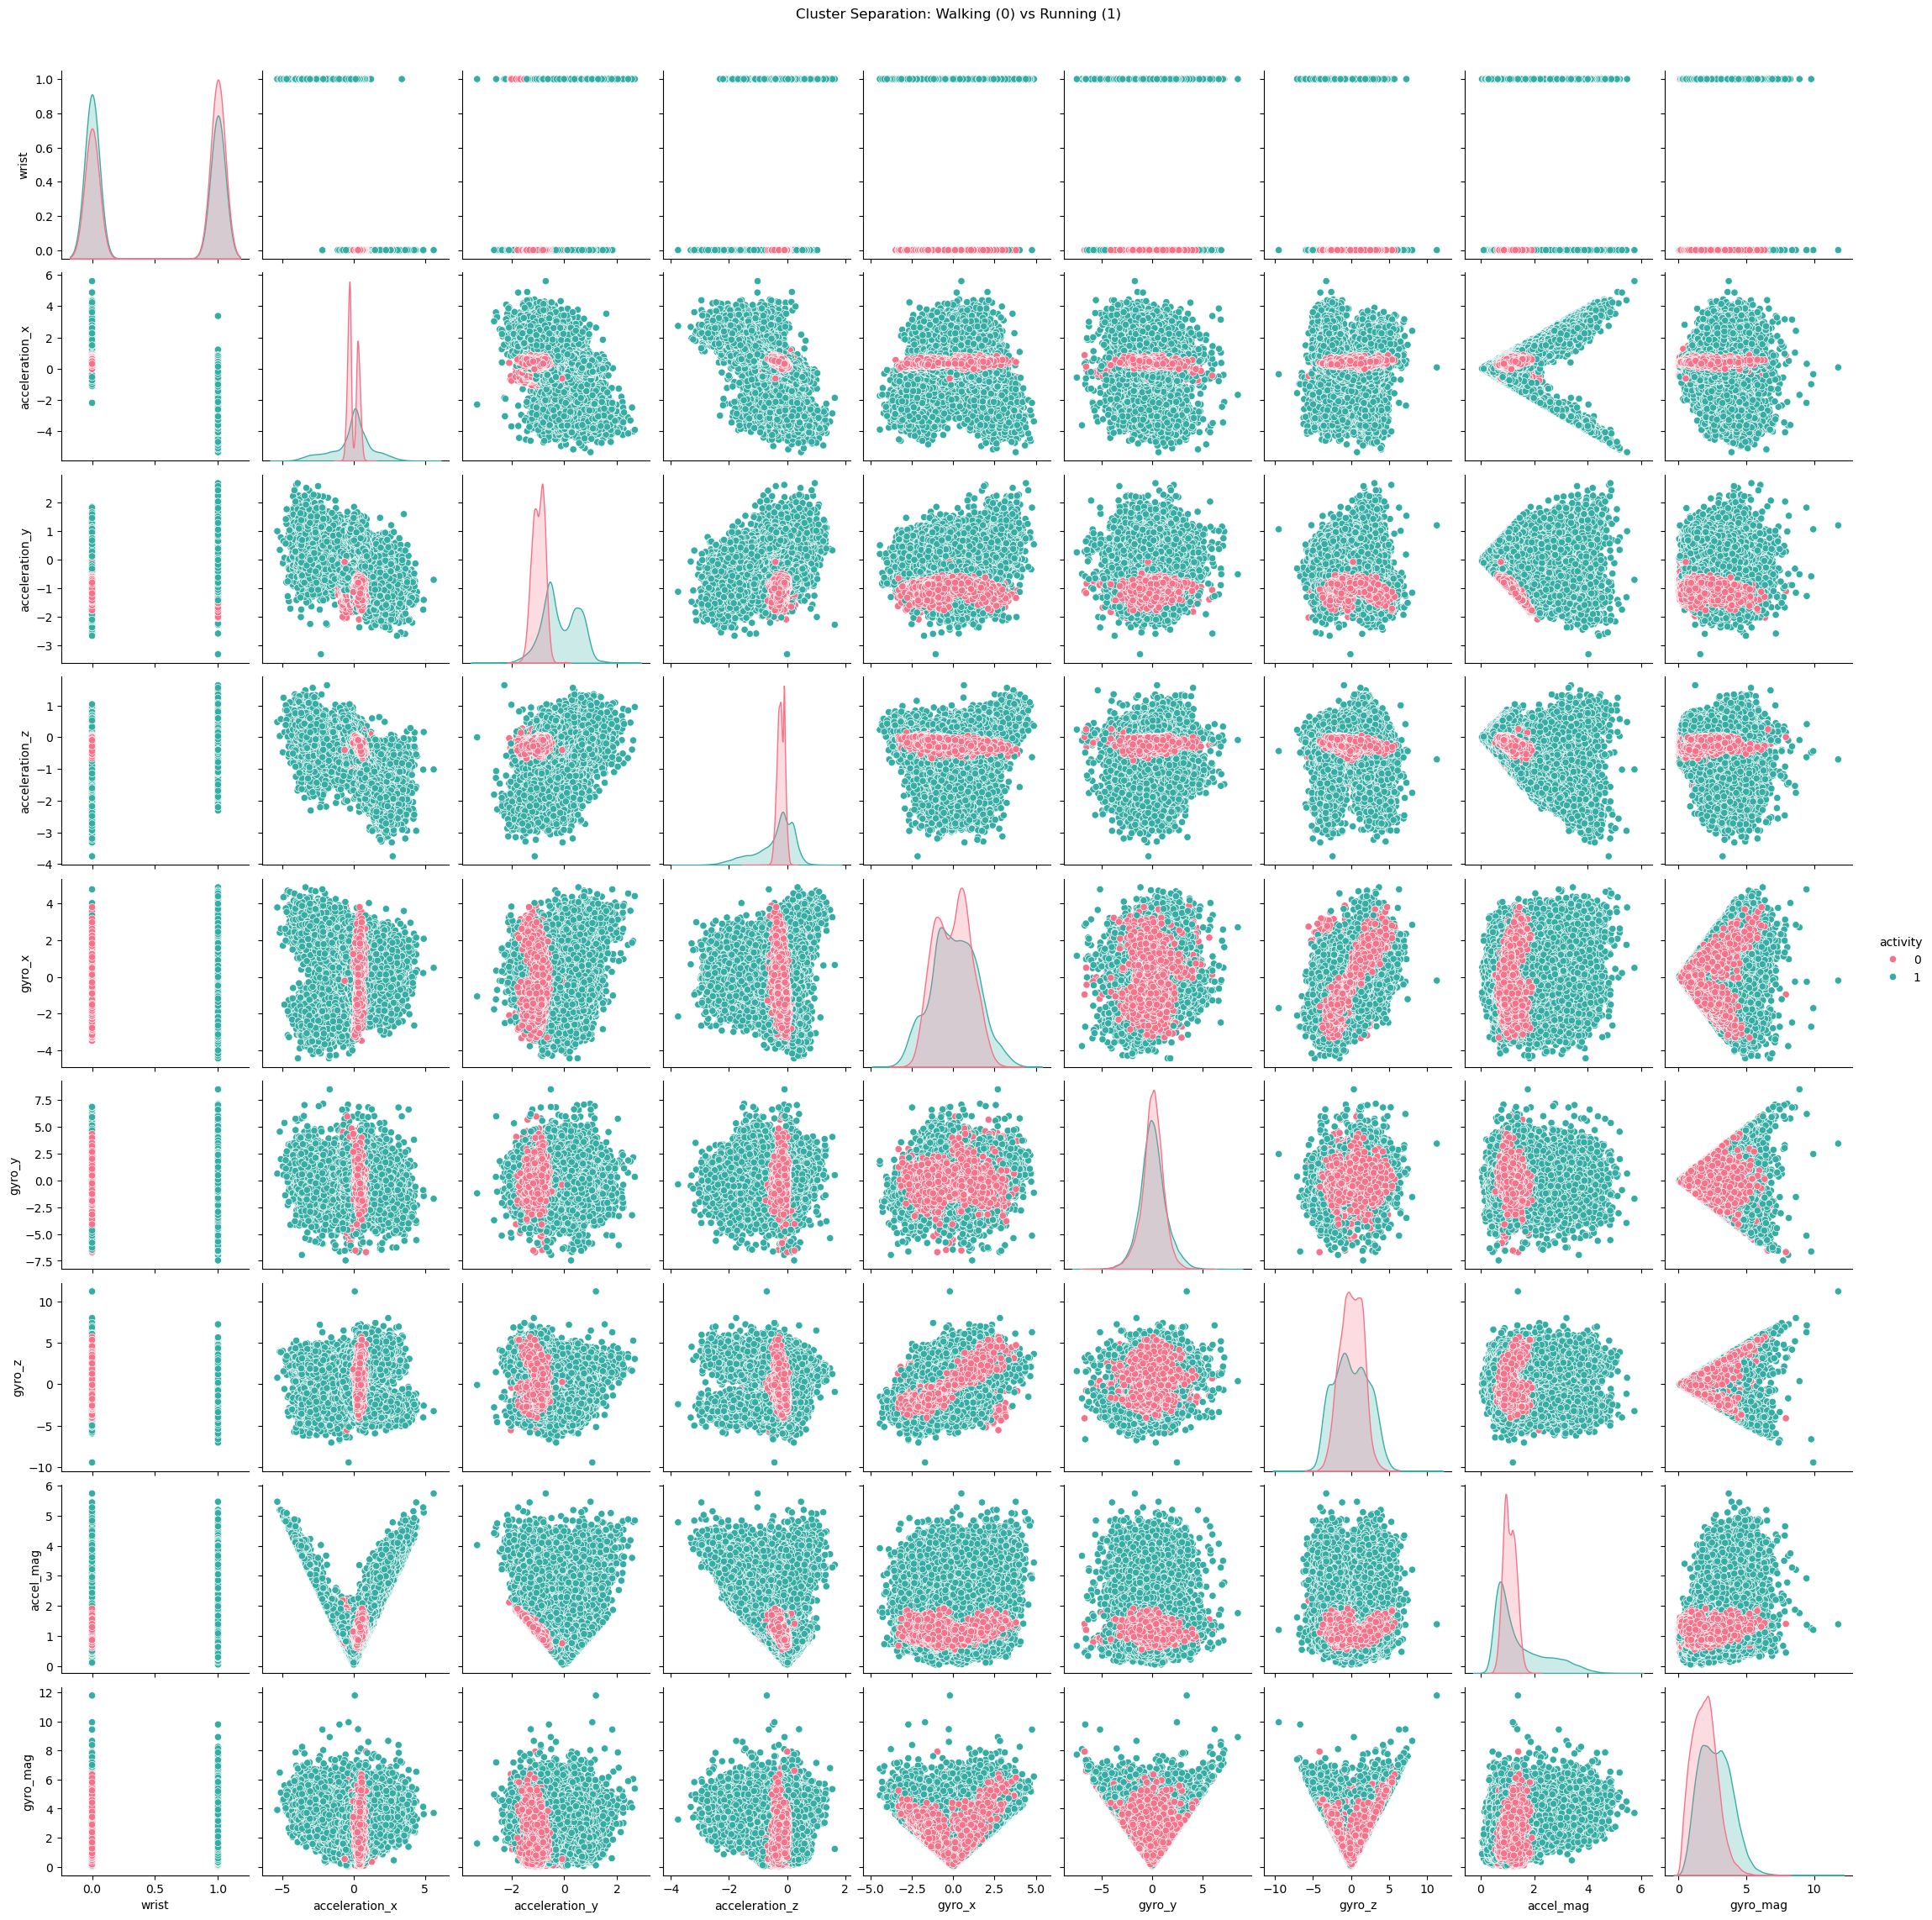

In [15]:
sns.pairplot(cleaned_data, hue='activity', diag_kind='kde', palette='husl')
plt.suptitle('Cluster Separation: Walking (0) vs Running (1)', y=1.02)
plt.show()

In [16]:
X = cleaned_data.drop('activity', axis=1)
y = cleaned_data['activity']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', C=1.0),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = []

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score
for name, model in models.items():
    if name == "Random Forest":
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc, "F1-Score": f1})
    print(f"Finished training {name}")

Finished training Logistic Regression
Finished training KNN
Finished training SVM
Finished training Random Forest


In [20]:
comparison_report = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print("\n--- Final Model Comparison Report ---")
print(comparison_report)


--- Final Model Comparison Report ---
                 Model  Accuracy  F1-Score
3        Random Forest  0.991797  0.991741
1                  KNN  0.991760  0.991667
2                  SVM  0.991572  0.991496
0  Logistic Regression  0.954660  0.953638


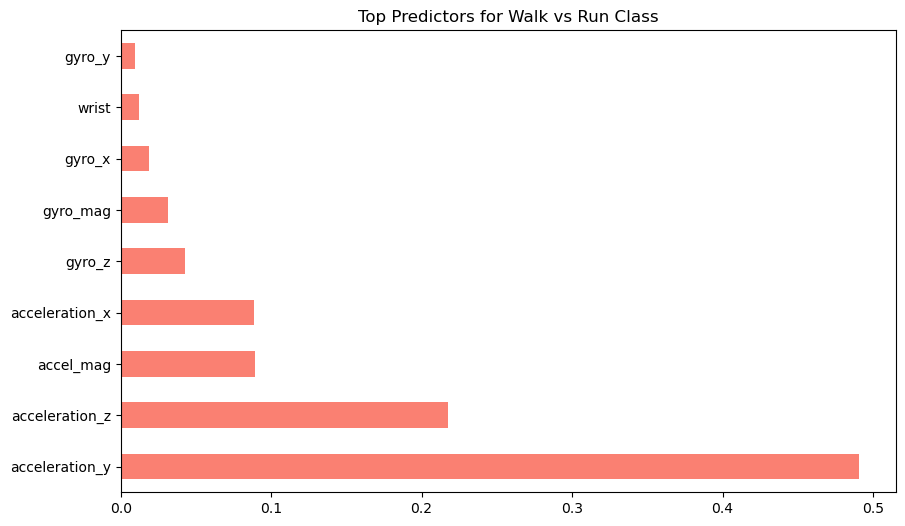

In [21]:
rf_model = models["Random Forest"]
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
importances.nlargest(10).plot(kind='barh', color='salmon')
plt.title('Top Predictors for Walk vs Run Class')
plt.show()

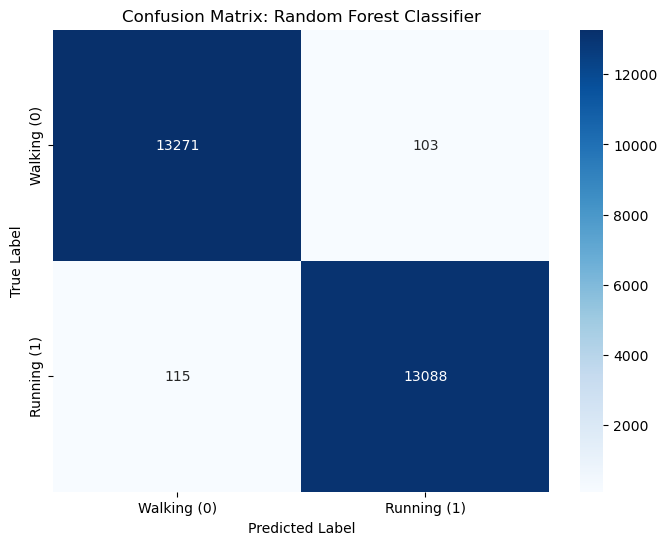

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
best_model = models["Random Forest"]
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Walking (0)', 'Running (1)'], 
            yticklabels=['Walking (0)', 'Running (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Random Forest Classifier')
plt.show()

Irrelevant Features:Removed by feature engineering.This forces the machine learning models to generalize based on sensor physics rather than memorizing specific users or time-of-day patterns, leading to a more robust and "honest" model.
Scaling disparity: Normalised data using Standard scaler.This ensures that all sensor inputs contribute equally to the distance calculations.
Non linear data : Random forest uses multiple decision trees to capture non-linear relationships and interactions between features